\begin{equation}
V(t) = V_0 e^{iwt}\\
I(t) = I_0 e^{iwt}
\end{equation}

Impedance:
\begin{equation}
Z = R\\
Z = \frac{1}{iwC}\\
Z = iwL
\end{equation}

In [20]:
#use sawtooth ng scipy or any function in python

#I. Solve for V output, use sympy to show and solve for equation
#sympy.solve()
#plot diff Voutput for various R's



In [21]:
from sympy import *
from scipy import signal
from numpy import angle
import numpy as np
import matplotlib.pyplot as plt
import math as m
%matplotlib inline

### I. Solving solution for $V_o$

In [22]:
vo, vr, ir, ic, il, R, C, L, w = symbols("vo, vr, ir, ic, il, R, C, L, w")
vi = 1
eq1 = [vi-vr-vo, ir-ic-il, vr-(R*ir), vo- (ic/I*w*C), vo-(I*w*L*il)]
sol = solve(eq1, [vo, vr, ir, ic, il])
#vi = vr + vo
#ir = ic + il
#vr = r*ir
#vo = ic/i*w*C
#vo = i*w*L*il

#ir = [(i*w*C)+(1/i*w*L)]*vo


In [23]:
sol

{vo: C*L*w/(C*L*w - I*C*R + I*L*R),
 vr: I*R*(-C + L)/(C*L*w - I*C*R + I*L*R),
 ir: I*(-C + L)/(C*L*w - I*C*R + I*L*R),
 ic: I*L/(C*L*w - I*C*R + I*L*R),
 il: -I*C/(C*L*w - I*C*R + I*L*R)}

### II. Plotting $|V_o|$ vs $\omega$ with diff Resistances

In [24]:
def Vo(w,R):
    return -I*w*L/(-I*w*L - R + R*C*L*w**2)

In [25]:
def wr(L,C):
    return 1/np.sqrt(L*C)

In [26]:
L = 1*10**-3
C = 1*10**-6
res_freq = wr(L,C)
Vo(res_freq,R=0)

1.00000000000000

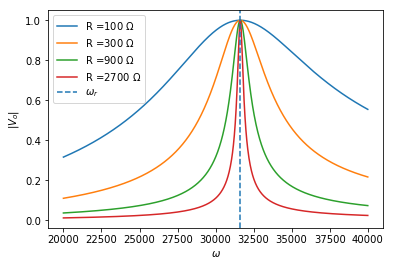

In [27]:
w_graph = np.linspace(20000,40000,1000)
x = res_freq
for R in [100, 300, 900, 2700]:
    Vo_graph = abs(Vo(w_graph,R))
    plt.plot(w_graph, Vo_graph, label = "R =" +str(R)+ r' $\Omega$')
plt.axvline(x, linestyle='dashed', label = r'$\omega_r$')
plt.legend()
plt.ylabel(r'$|V_o|$')
plt.xlabel(r'$\omega$')
plt.show()

#### III. Plotting phase vs $\omega$ of diff Resistances

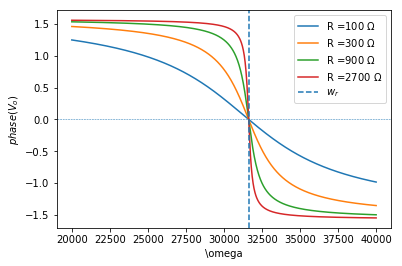

In [28]:
w_graph = np.linspace(20000,40000,1000)
for R in [100, 300, 900, 2700]:
    Vo_g = (Vo(w_graph,R))
    phase = np.empty(len(Vo_g))
    for i in range(len(Vo_g)):
        Vo_re = float(re(Vo_g[i]))
        Vo_im = float(im(Vo_g[i]))
        phase[i] = np.arctan2(Vo_im,Vo_re)
    plt.plot(w_graph, phase, label = "R =" +str(R)+ r' $\Omega$')
x = res_freq
plt.axvline(x, linestyle='dashed', label = r'$w_r$')
plt.axhline(0, linewidth = 0.5,linestyle='dashed')
plt.ylabel(r'$phase(V_o)$')
plt.xlabel(r'\omega')
plt.legend()
plt.show()

### IV. Sawtooth, oscillations something

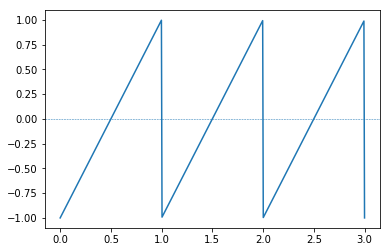

In [29]:
t = np.linspace(0, 3, 500)
plt.plot(t,signal.sawtooth(2*np.pi*t))
plt.axhline(0, linestyle='dashed', linewidth=0.5)

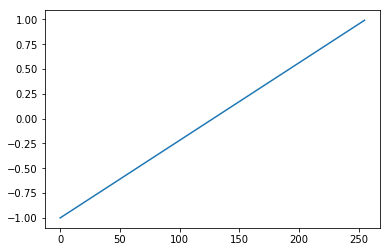

C:\Users\Andrea Rica\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


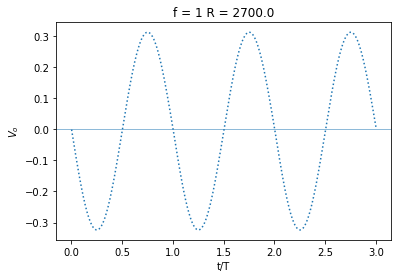

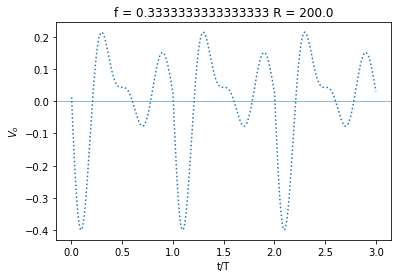

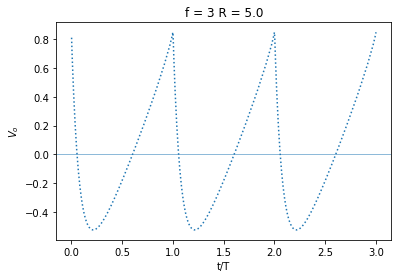

In [30]:
T = 1
f = 1/T
vi_saw = np.array([signal.sawtooth(2*np.pi*f*t) for t in np.arange(256)/256])
plt.plot(vi_saw)
plt.show()

alist = vi_saw/np.sqrt(256)
blist = np.sqrt(256) * np.fft.fft(alist)

def plot3(fac, resistance):
    wi = fac * res_freq
    # How were the limits of arange() in the following line chosen?
    volist = np.concatenate(([Vo(wi*s,resistance) for s in np.arange(1,129)],
                             [0.0],
                             [Vo(wi*s,resistance) for s in np.arange(-127, 0)]))
    vtrans = np.fft.ifft(blist * volist)
    plotlist = np.array([[(k+1)/256., vtrans[k%256]] for k in range(768)])
    plt.plot(plotlist[:,0], plotlist[:,1], linestyle = 'dotted')
    plt.axhline(0, linewidth = 0.5)
    plt.ylabel(r'$V_o$')
    plt.xlabel('t/T')
    plt.title("f = " +str(fac)+" R = " +str(resistance))
    plt.show()
    

plot3(1, 2700.0)
plot3(1/3, 200.0)
plot3(3, 5.0)

In [31]:
type(vi_saw[0])

numpy.float64

### V. Plotting $|V_o|$ vs $\omega$ of parallel R-L-C circuit diff resistances

In [32]:
def Vo1(w):
    return C*L*w**2/(C*w**2*L + (((C*L*w**2)-1)*(1-(C*L*w**2) + I*R*C*w)))

In [33]:
def wr1(L,C):
    return [np.sqrt(3+np.sqrt(5))/np.sqrt(2*L*C),np.sqrt(3-np.sqrt(5))/np.sqrt(2*L*C)]

In [34]:
L = 1*10**-3
C = 1*10**-6
res_freq1 = wr1(L,C)
R = 0
res_freq1

[51166.727360169265, 19543.950758485476]

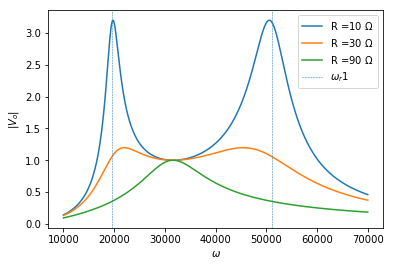

In [45]:
w_g = np.linspace(10000,70000,1000)
x1 = res_freq1
for R in [10, 30, 90]:
    Vo_graph = abs(Vo1(w_g))
    plt.plot(w_g, Vo_graph, label = "R =" +str(R)+ r' $\Omega$')
plt.axvline(x1[0], linewidth = 0.5, linestyle='dashed', label = r'$\omega_r1$')
plt.axvline(x1[1], linewidth = 0.5, linestyle='dashed')
plt.legend()
plt.ylabel(r'$|V_o|$')
plt.xlabel(r'$\omega$')
plt.show()

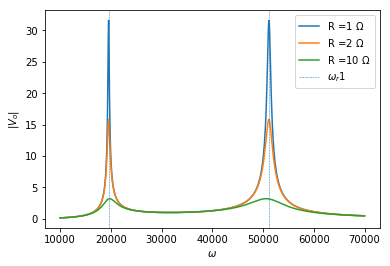

In [46]:
w_g = np.linspace(10000,70000,1000)
x1 = res_freq1
for R in [1,2,10]:
    Vo_graph = abs(Vo1(w_g))
    plt.plot(w_g, Vo_graph, label = "R =" +str(R)+ r' $\Omega$')
plt.axvline(x1[0], linewidth = 0.5, linestyle='dashed', label = r'$\omega_r1$')
plt.axvline(x1[1], linewidth = 0.5, linestyle='dashed')
plt.legend()
plt.ylabel(r'$|V_o|$')
plt.xlabel(r'$\omega$')
plt.show()